In [36]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import math

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Preprocesado y modelado
# -----------------------------------------------------------------------


# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, RobustScaler# para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 
from category_encoders import TargetEncoder
# Sacar número de clusters y métricas
# -----------------------------------------------------------------------
# pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Modelos de clustering
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

# Para visualizar los dendrogramas
# -----------------------------------------------------------------------
import scipy.cluster.hierarchy as sch
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

import sys 
sys.path.append("../../../")
import src.soporte_clustering as sc


In [37]:
df = pd.read_csv("../../../datos/Global_Superstore.csv", encoding="latin-1")
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51150,41475,NI-2012-8920,06-06-2012,13-06-2012,Standard Class,MW-8220,Mitch Webber,Consumer,Kano,Kano,Nigeria,NaN,Africa,Africa,OFF-OIC-10000492,Office Supplies,Fasteners,"OIC Push Pins, 12 Pack",4.302,1,0.7,-4.188,0.1,Medium


In [38]:
visualizar = sc.Exploracion(df)
visualizar.explorar_datos()

5 registros aleatorios:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
34173,45860,EG-2014-9000,06-03-2014,09-03-2014,First Class,RD-9930,Russell D'Ascenzo,Consumer,Al Minya,Al Minya,Egypt,NaN,Africa,Africa,OFF-BIN-10004512,Office Supplies,Art,"Binney & Smith Pens, Easy-Erase",24.420,2,0.0,0.0000,3.86,High
38697,8204,MX-2013-151071,11-12-2013,17-12-2013,Standard Class,TT-21460,Tonja Turnell,Home Office,Tampico,Tamaulipas,Mexico,NaN,LATAM,North,OFF-PA-10003301,Office Supplies,Paper,"Green Bar Parchment Paper, Recycled",33.180,3,0.0,9.6000,2.56,Medium
25585,837,MX-2011-109155,23-12-2011,28-12-2011,Standard Class,MH-17440,Mark Haberlin,Corporate,Juárez,Chihuahua,Mexico,NaN,LATAM,North,OFF-BI-10004042,Office Supplies,Binders,"Cardinal Binding Machine, Recycled",100.260,3,0.0,42.0600,7.82,Medium
48956,32888,US-2013-132423,16-04-2013,20-04-2013,Standard Class,MY-18295,Muhammed Yedwab,Corporate,Grapevine,Texas,United States,76051.0,US,Central,OFF-FA-10002988,Office Supplies,Fasteners,Ideal Clamps,8.040,5,0.2,2.9145,0.56,High
8044,14596,ES-2012-2223892,22-09-2012,24-09-2012,First Class,KE-16420,Katrina Edelman,Corporate,Utrecht,Utrecht,Netherlands,NaN,EU,Central,TEC-CO-10000620,Technology,Copiers,"Brother Wireless Fax, Digital",189.225,1,0.5,-155.1750,42.15,High




Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570




Estadísticas descriptivas de las columnas categóricas:


,count,unique,top,freq
Order ID,51290,25035,CA-2014-100111,14
Order Date,51290,1430,18-06-2014,135
Ship Date,51290,1464,22-11-2014,130
Ship Mode,51290,4,Standard Class,30775
Customer ID,51290,1590,PO-18850,97
Customer Name,51290,795,Muhammed Yedwab,108
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994




Número de valores nulos por columna:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


Distribución de valores categóricos:

Columna: Order ID
Order ID
CA-2014-100111     14
IN-2012-41261      13
TO-2014-9950       13
IN-2013-42311      13
NI-2014-8880       13
                   ..
ES-2013-1579342     1
MX-2012-134460      1
IN-2013-34366       1
US-2011-152723      1
CA-2012-162544      1
Name: count, Length: 25035, dtype: int64

Columna: Order Date
O

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.039078
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025449
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.079056
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.039078,-0.025449,0.768073,0.272649,-0.079056,0.354441,1.000000


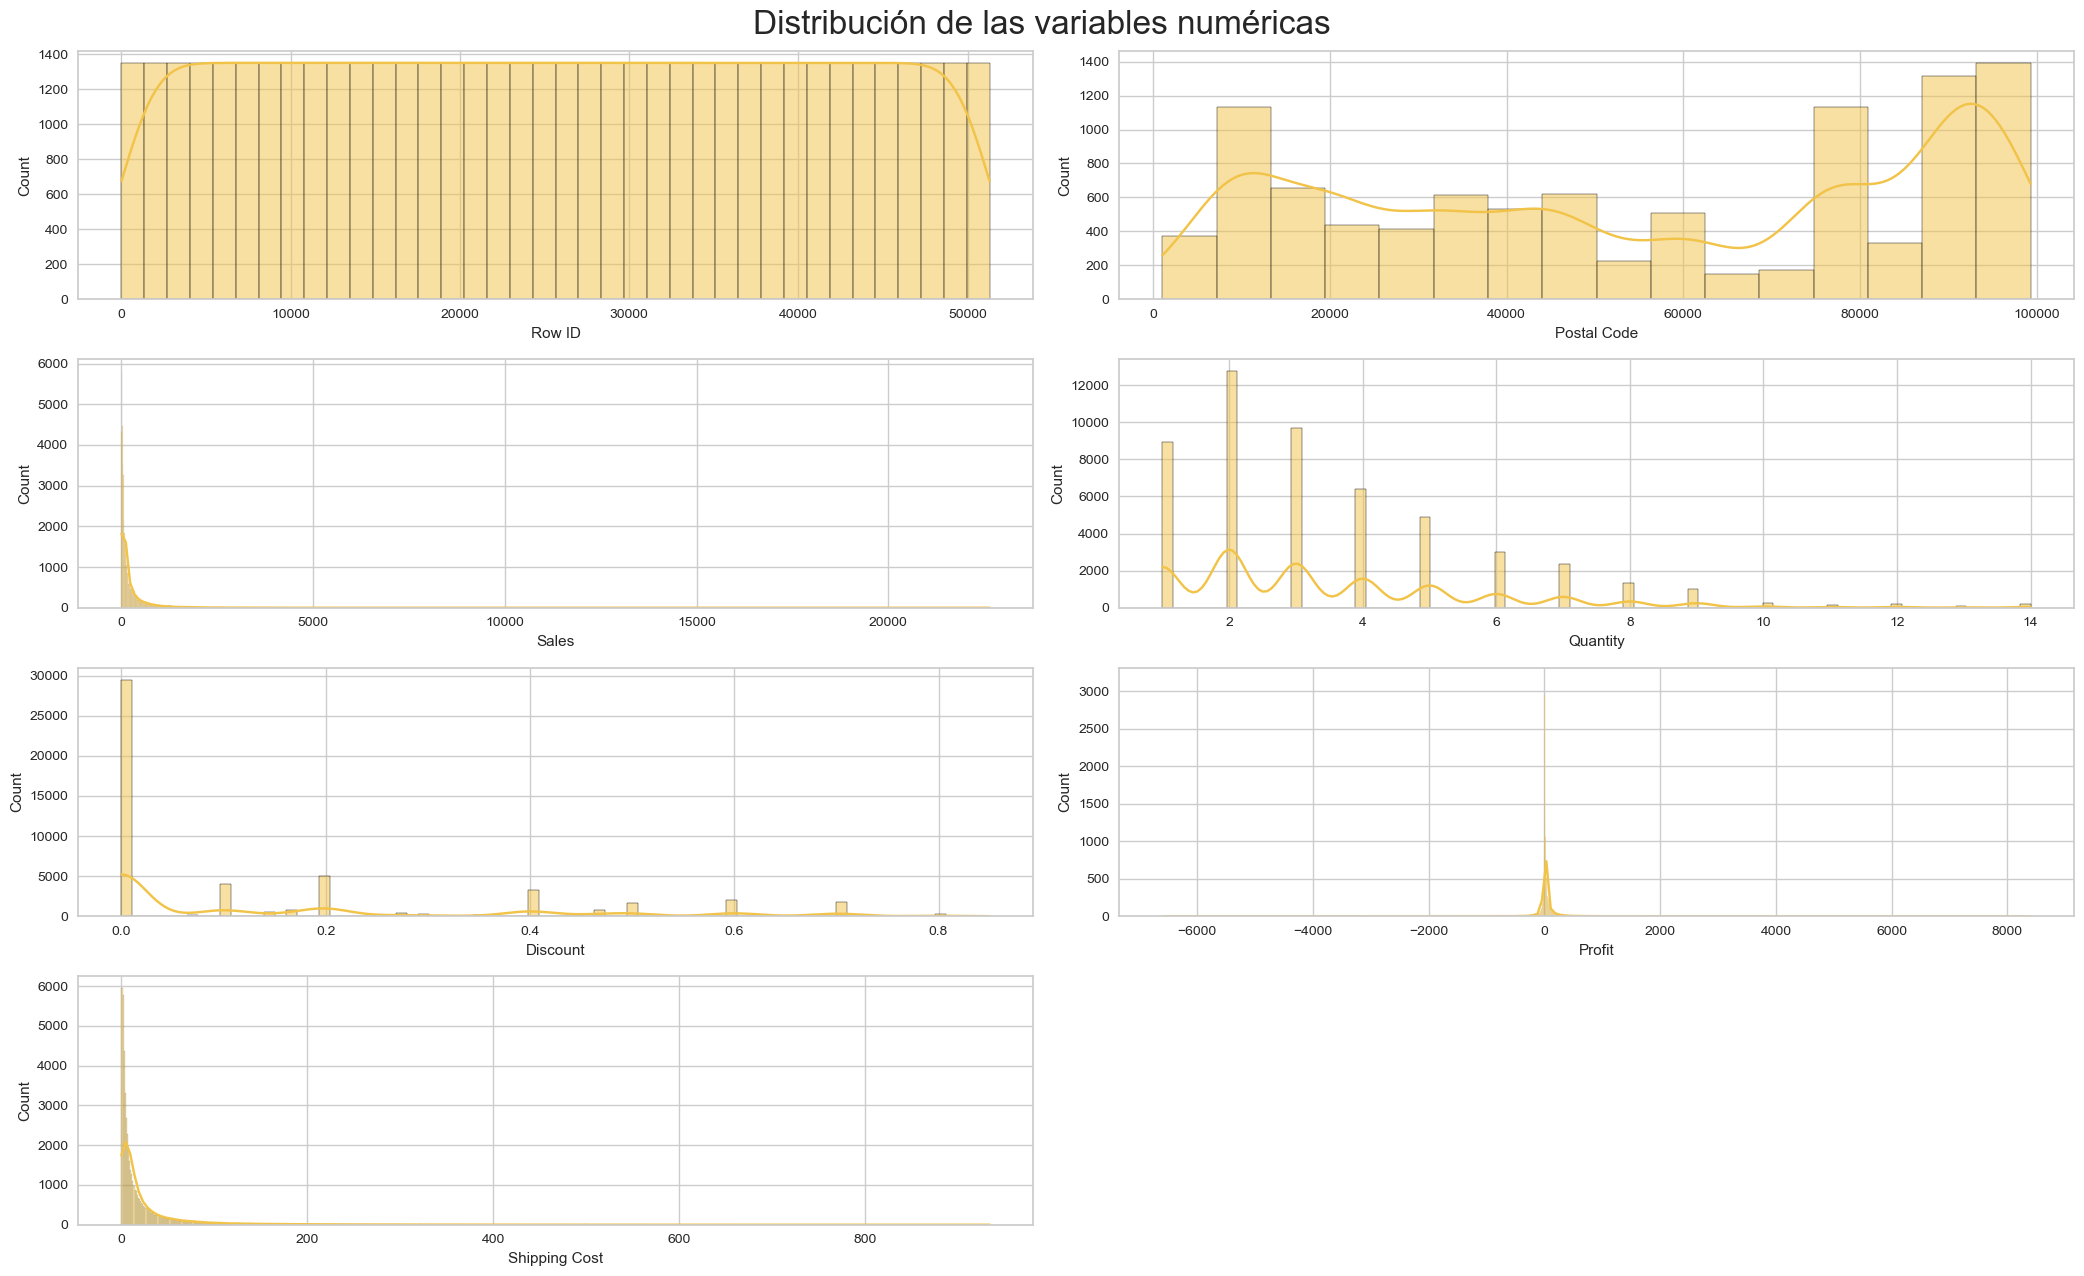

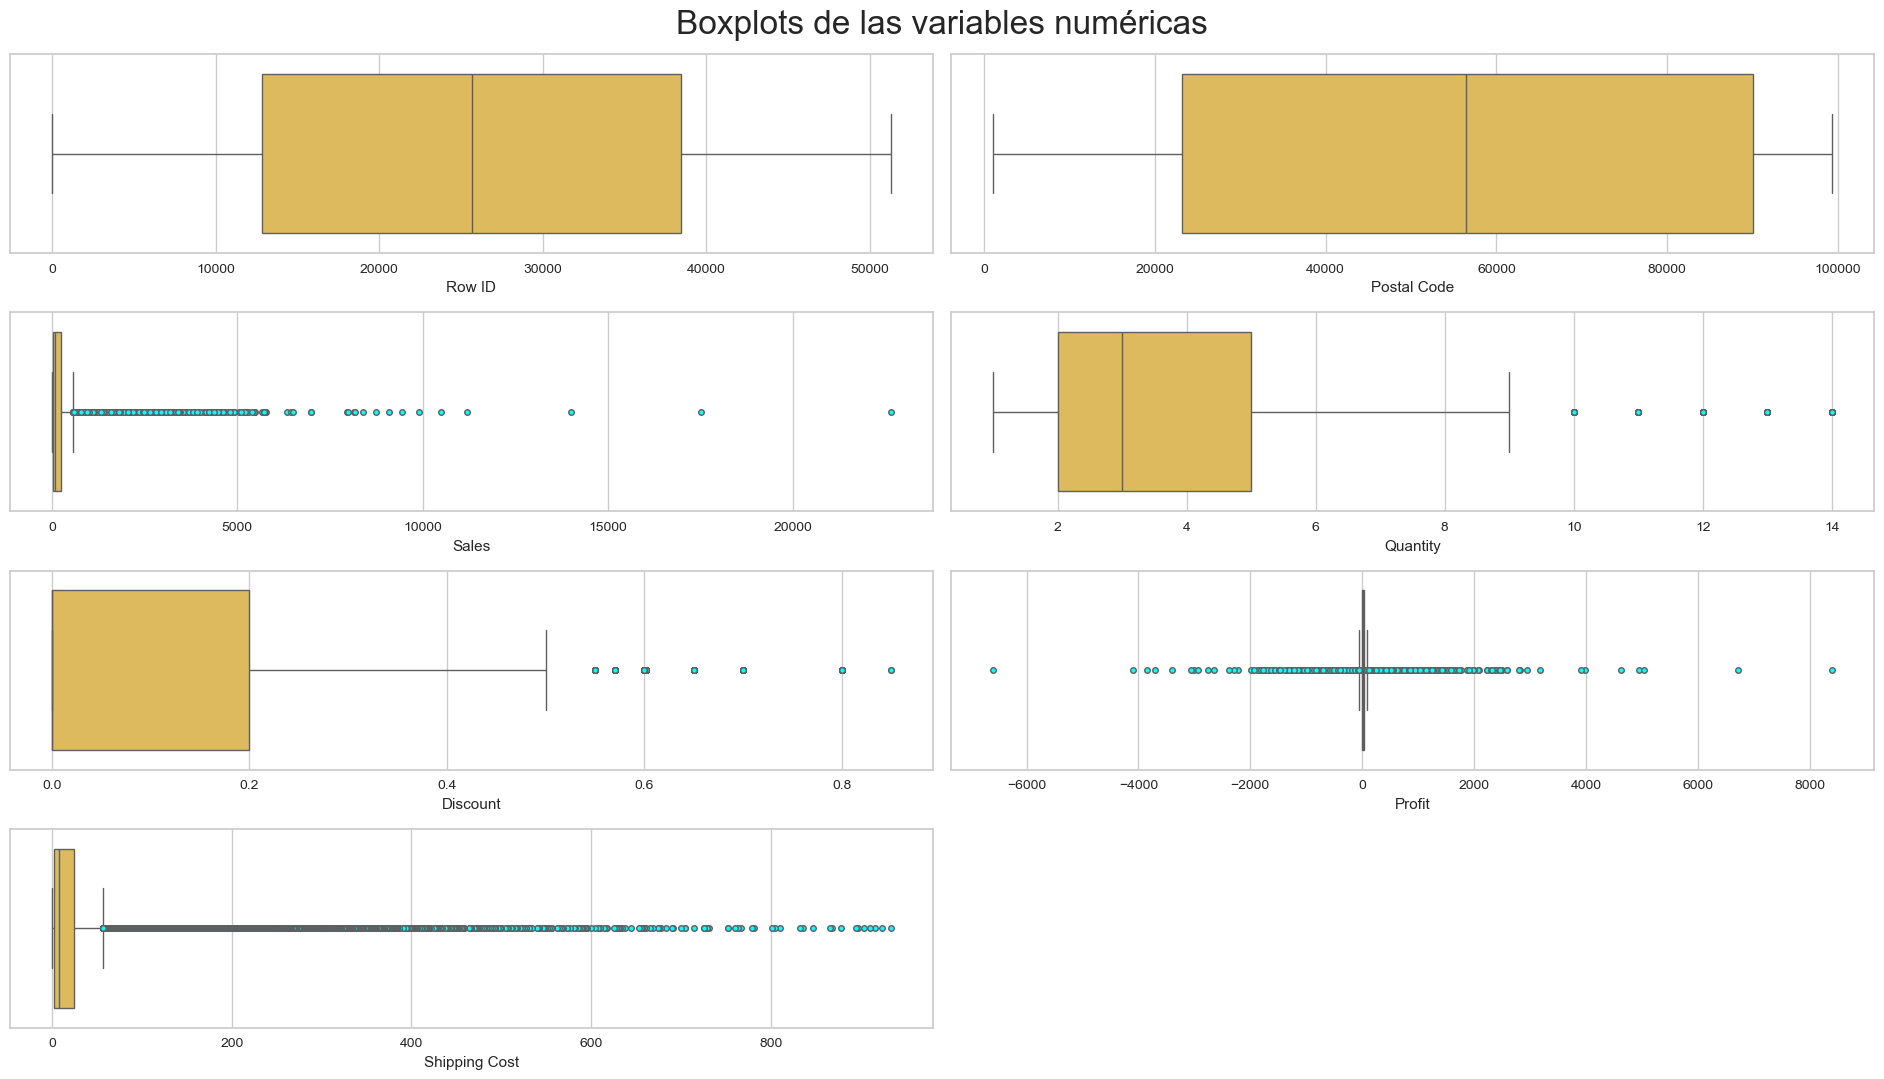

In [23]:
visualizar.visualizar_numericas()

In [24]:
len(df["Row ID"].unique())

51290

In [25]:
df.shape

(51290, 24)

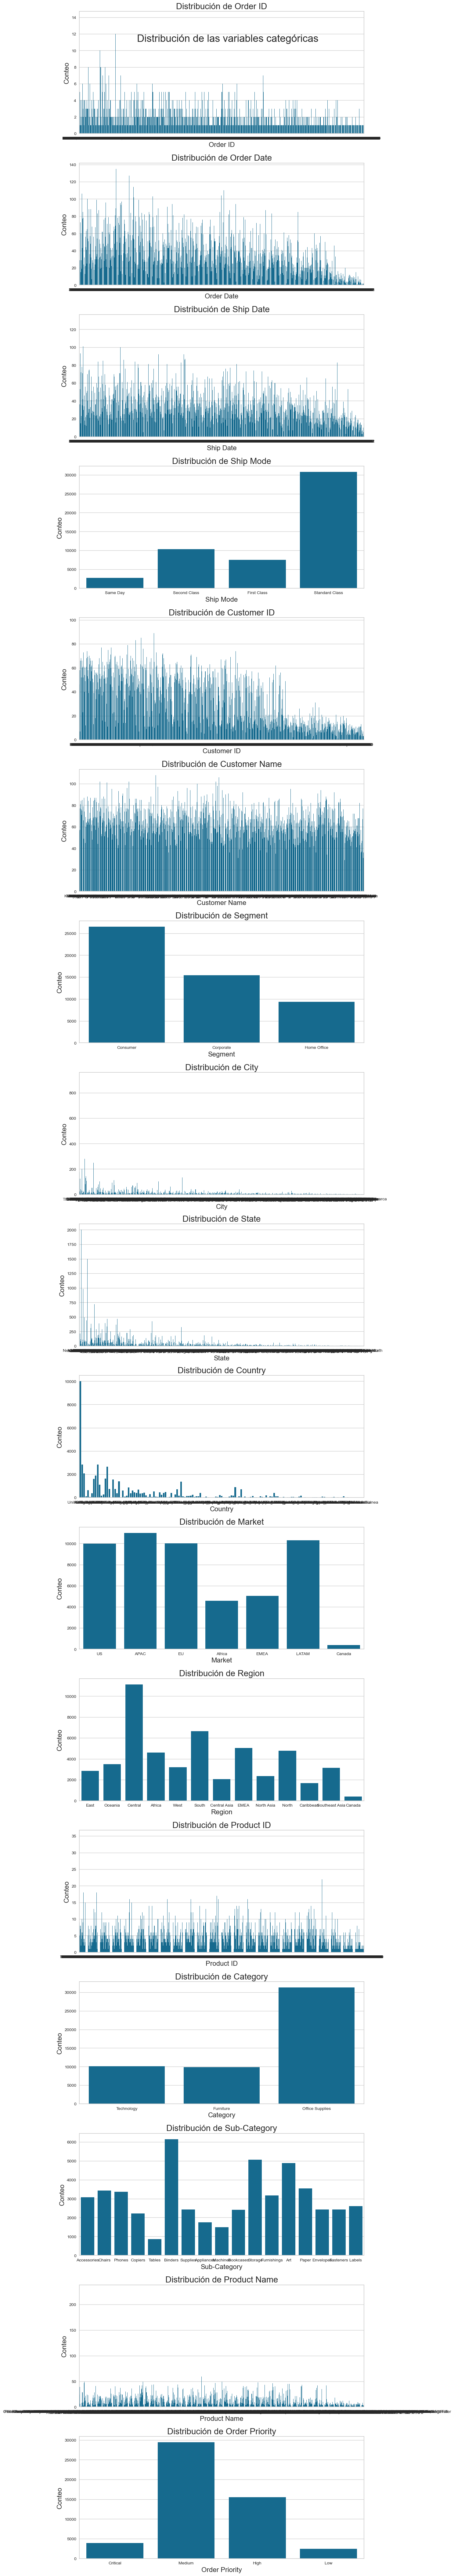

In [26]:
visualizar.visualizar_categoricas()

In [39]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [40]:
df["Discount"].unique()

array([0.   , 0.1  , 0.2  , 0.4  , 0.15 , 0.3  , 0.5  , 0.17 , 0.47 ,
       0.25 , 0.002, 0.07 , 0.32 , 0.27 , 0.7  , 0.35 , 0.6  , 0.65 ,
       0.8  , 0.57 , 0.37 , 0.402, 0.55 , 0.202, 0.45 , 0.602, 0.85 ])

# Conclusiones
1. Columnas a eliminar
    - ['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','City','State','Country','Postal Code','Product Name']

2. Outliers
    - No se van a gestionar de momento, son datos reales


# Eliminar Columnas

In [41]:
cols_chao = ['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','City','State','Country','Postal Code','Product Name']
df.drop(columns = cols_chao, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ship Mode       51290 non-null  object 
 1   Segment         51290 non-null  object 
 2   Market          51290 non-null  object 
 3   Region          51290 non-null  object 
 4   Product ID      51290 non-null  object 
 5   Category        51290 non-null  object 
 6   Sub-Category    51290 non-null  object 
 7   Sales           51290 non-null  float64
 8   Quantity        51290 non-null  int64  
 9   Discount        51290 non-null  float64
 10  Profit          51290 non-null  float64
 11  Shipping Cost   51290 non-null  float64
 12  Order Priority  51290 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 5.1+ MB


# Veamos las Gráficas de nuevo

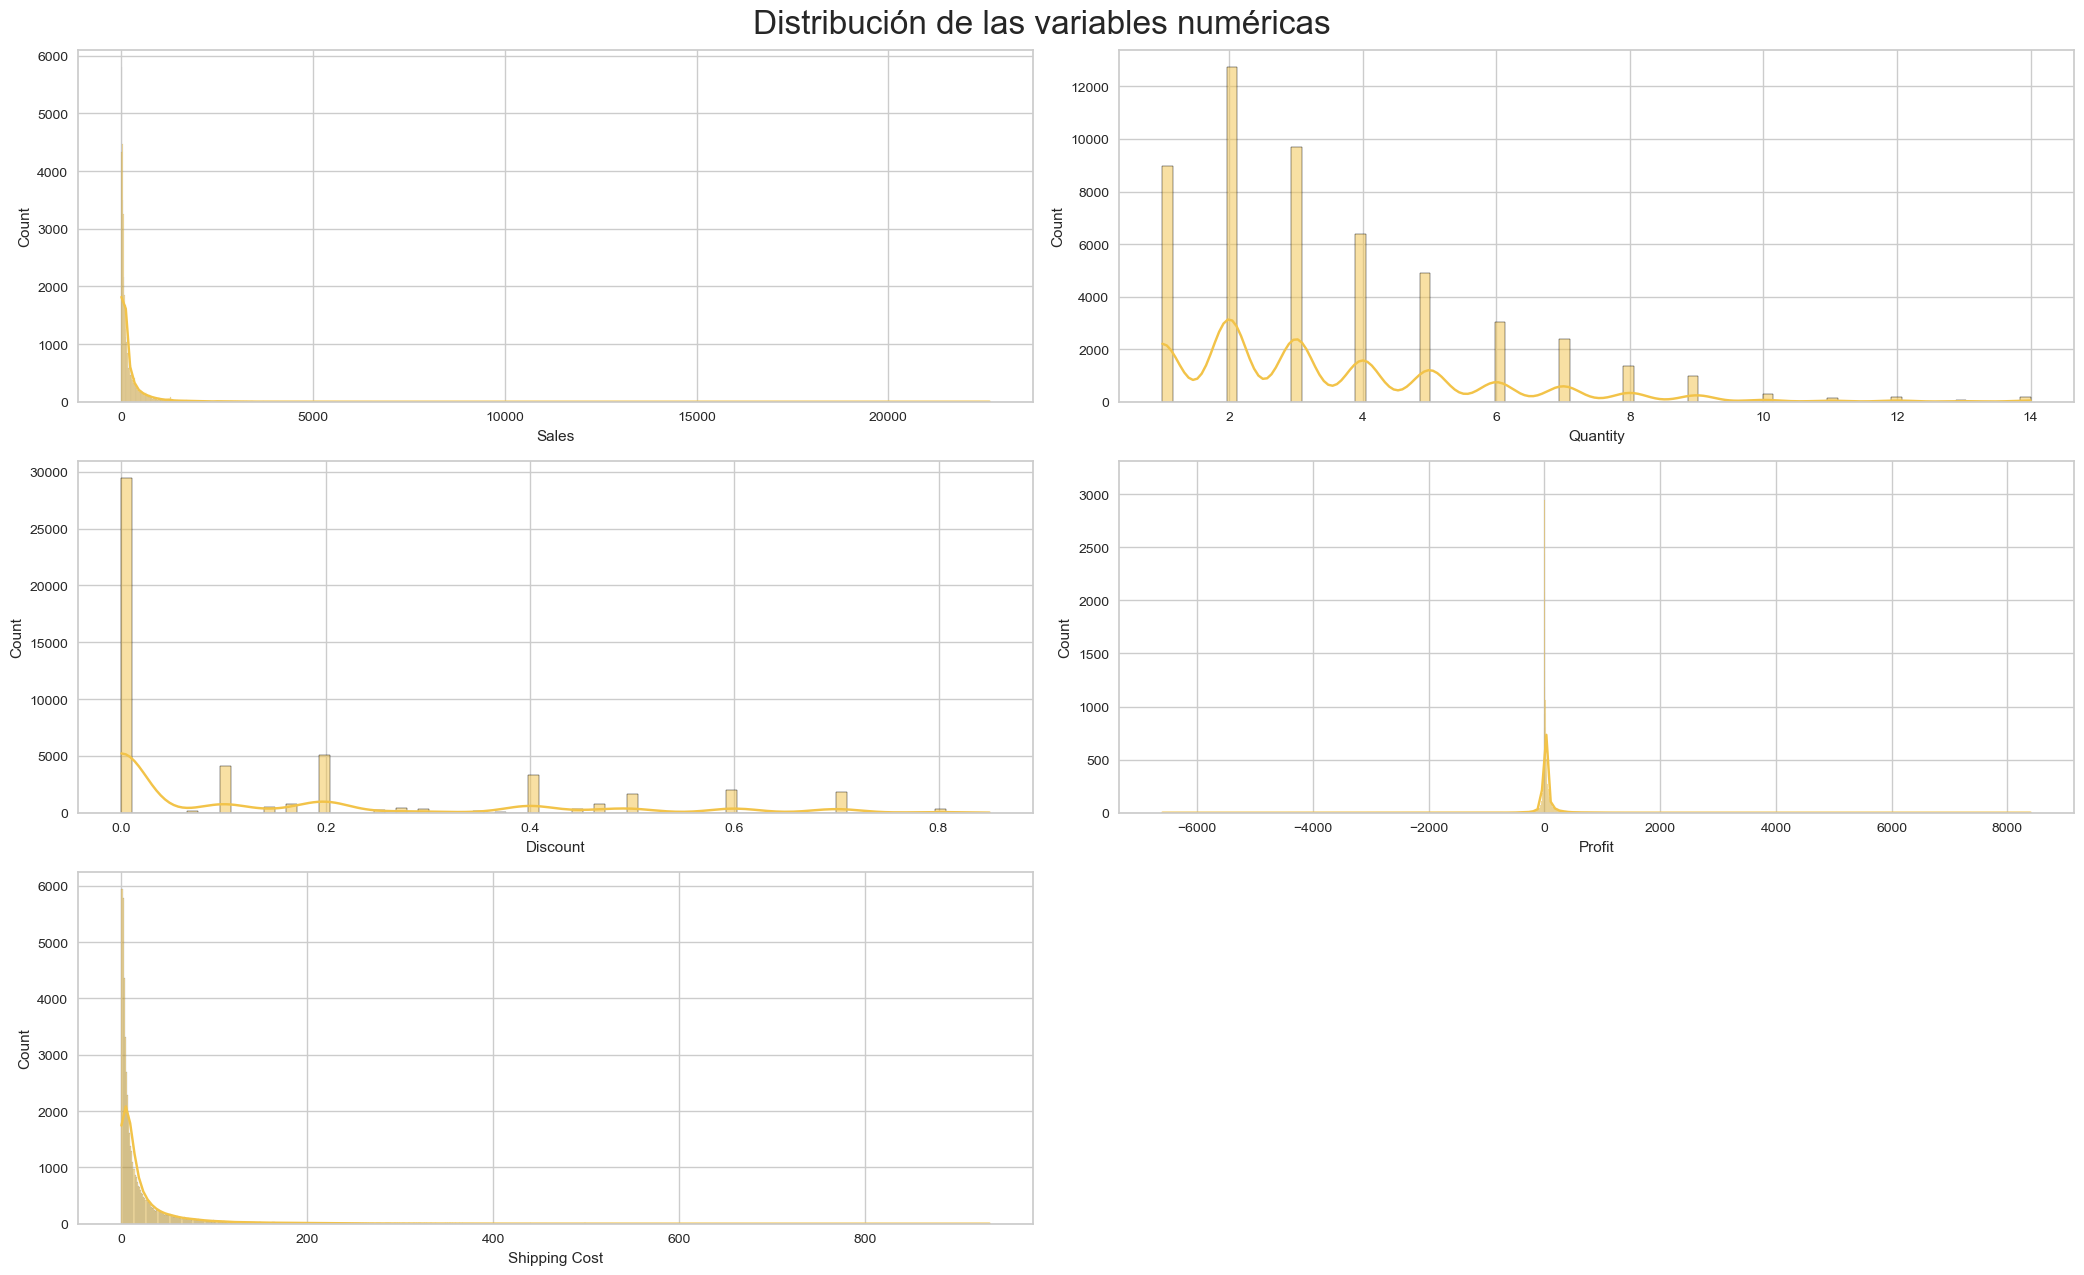

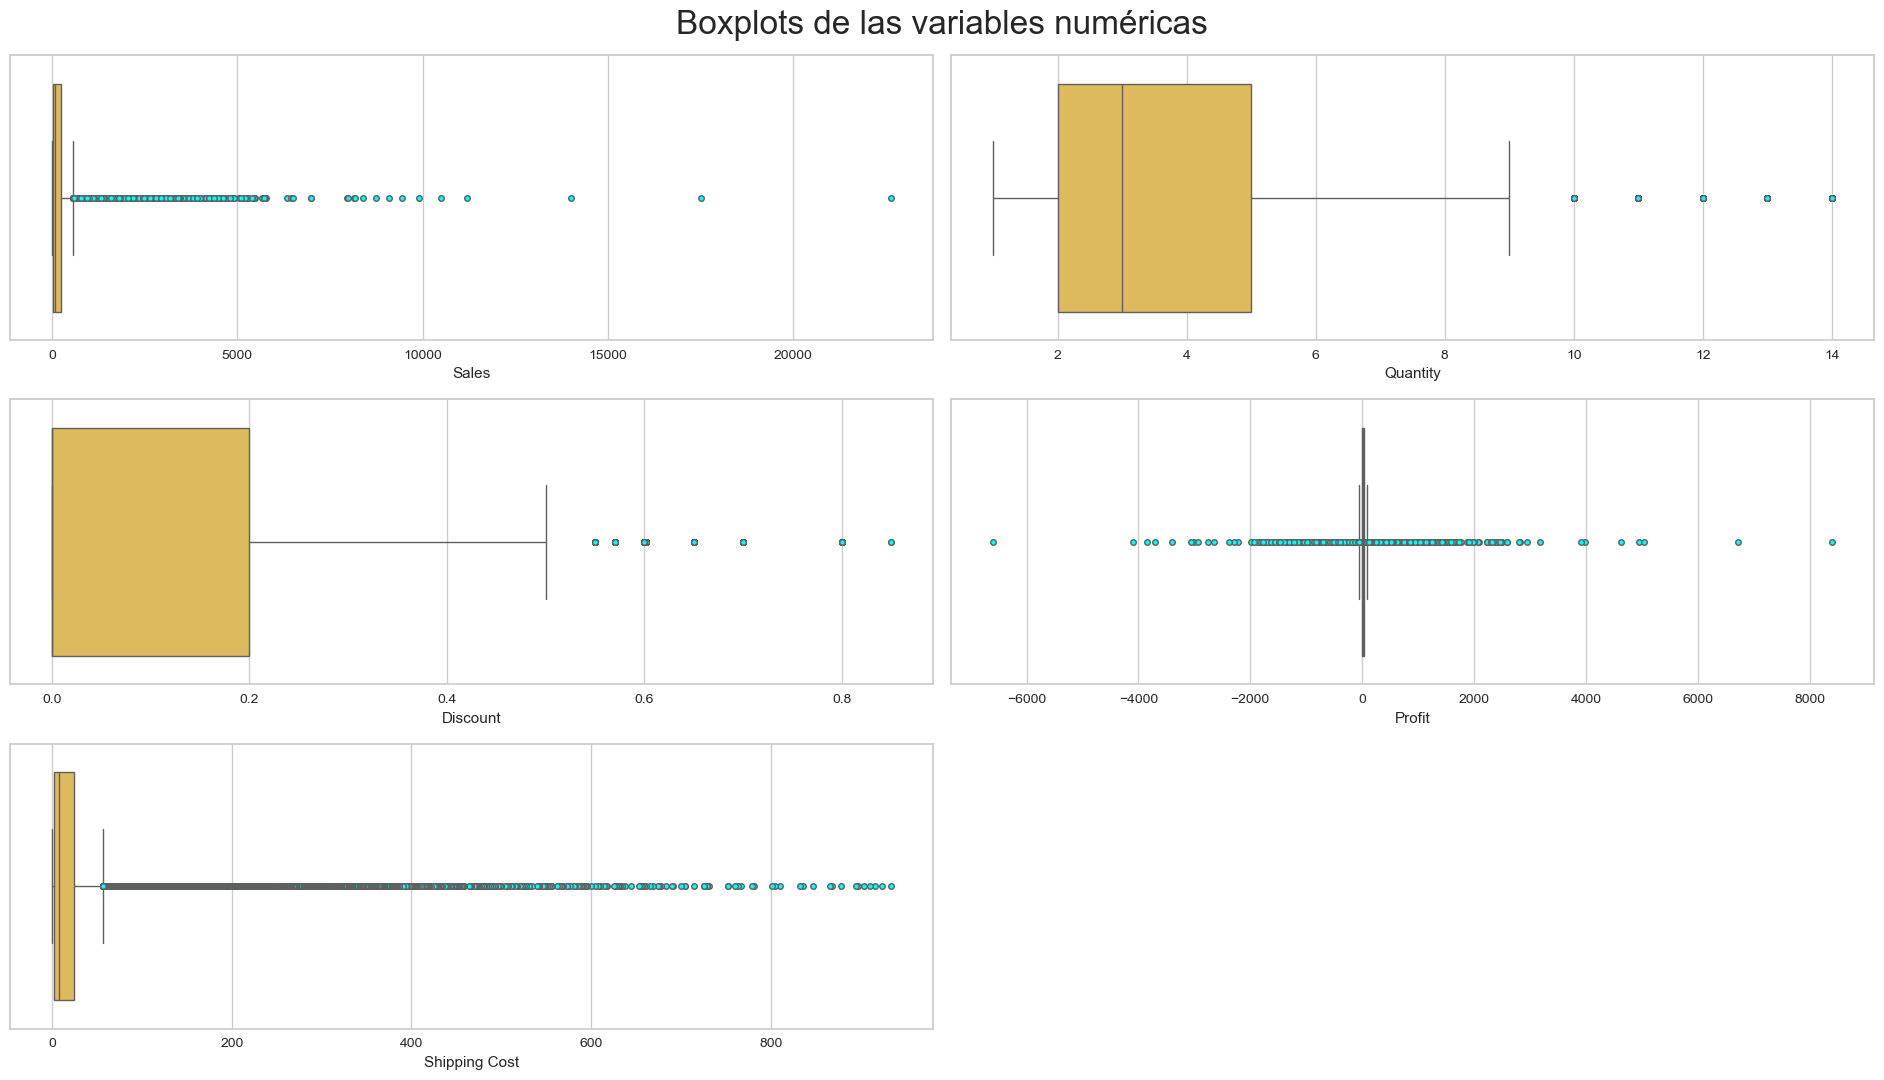

In [42]:
explorar = sc.Exploracion(df)
explorar.visualizar_numericas()

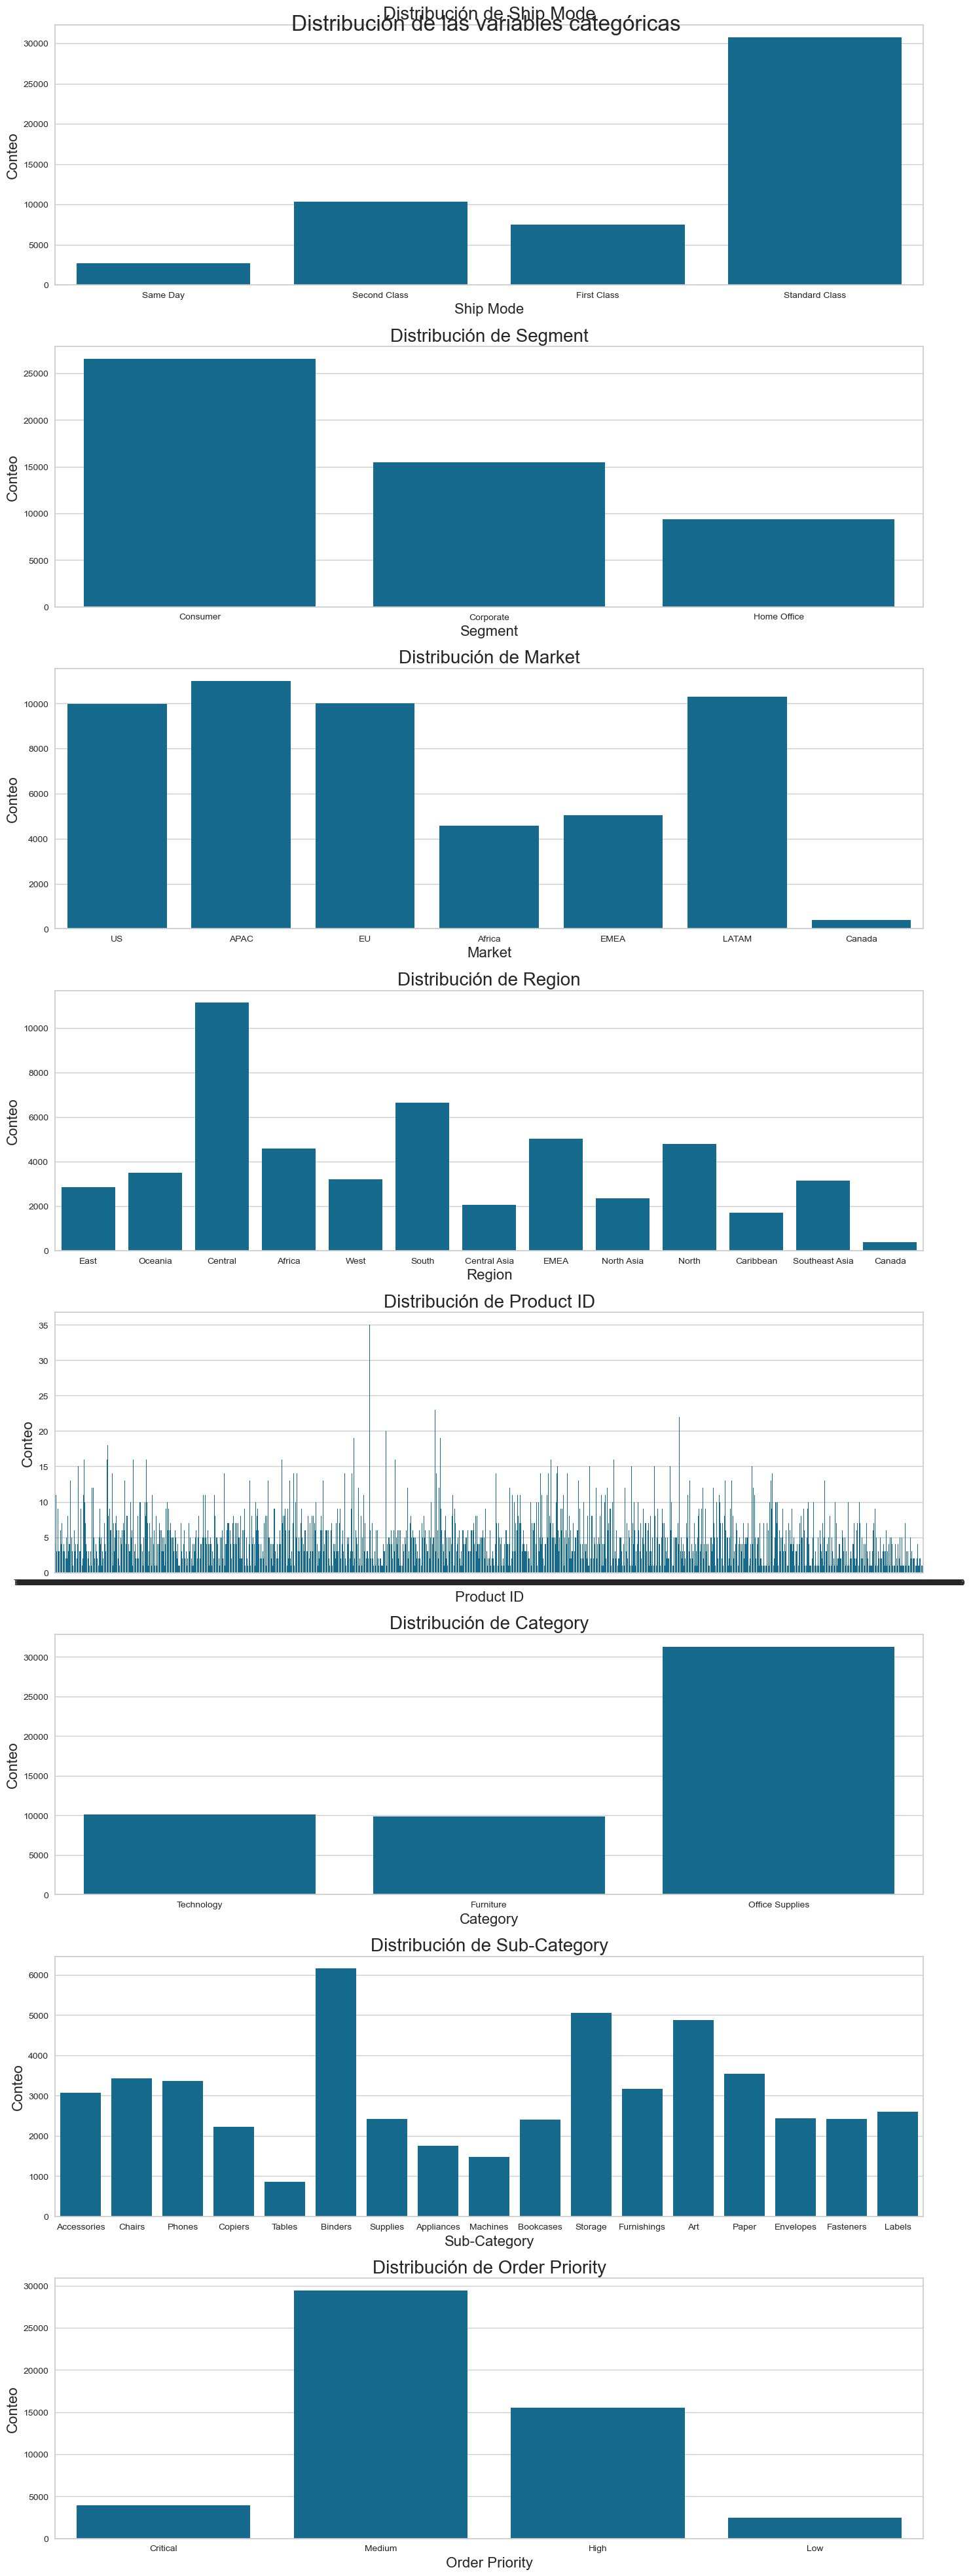

In [43]:
explorar.visualizar_categoricas()

In [44]:
df.columns

Index(['Ship Mode', 'Segment', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

# Pasar a categoría:
    - ["Ship Mode","Segment","Market","Region","Category","Sub-Category","Order Priority"]

In [45]:
cols = ["Ship Mode","Segment","Market","Region","Category","Sub-Category","Order Priority"]
for col in cols:
    df[col] = df[col].astype("category")

# Guardar

In [46]:
df.to_pickle("../../../datos/01_clustering/01_datos_gestionados.pkl")